In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/추천시스템
!ls

Mounted at /content/drive
/content/drive/MyDrive/추천시스템
 anime_weights2.csv   anime_weights.npy         image_review_all.json  'Untitled5.ipynb의 사본'
 anime_weights2.npy   anime_with_synopsis.csv   ipynb		        user_weights2.npy
 anime_weights.csv    filter_all_t.json         Recipe		        user_weights.npy


In [ ]:
import numpy as np
import pandas as pd

## Dataset Import

### Dataset 정리
- interaction
  - user_id (User ID), recipe_id (Recipe ID), rating (해당 유저가 해당 요리에 준 평점), review (리뷰)
  - date (날짜)
- recipes
  - name (요리 이름), id (Recipe ID랑 연동되는지 확인)
  - minutes(조리 시간), tags, nutrituion, n_steps, steps, description, ingredients, n_ingredients
  - contributor_id (해당 Recipe를 적은 사람), submitted (적은 날짜)

In [ ]:
interactions_df = pd.read_csv("Recipe/RAW_interactions.csv")
recipes_df = pd.read_csv("Recipe/RAW_recipes.csv")

In [ ]:
interactions_df.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


In [ ]:
recipes_df.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


### Interaction의 recipe와 Recipe의 recipe가 연동되는지 확인

In [ ]:
# 개수가 같다!
print(interactions_df['recipe_id'].nunique(), recipes_df['id'].nunique())

231637 231637


In [ ]:
recipes_df[recipes_df['id']==40893]

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
225877,white bean green chile pepper soup,40893,495,1533,2002-09-21,"['weeknight', 'time-to-make', 'course', 'main-...","[204.8, 5.0, 9.0, 26.0, 24.0, 2.0, 10.0]",4,"['combine beans , onion , chilies , 1 / 2 teas...",easy soup for the crockpot.,"['great northern beans', 'yellow onion', 'dice...",9


In [ ]:
# "Chilly, 1/2 teaspoon"을 보니 연동되는 것 같다.
reviews = interactions_df[interactions_df['recipe_id'] == 40893]['review']
reviews[1]

"So simple, so delicious! Great for chilly fall evening. Should have doubled it ;)<br/><br/>Second time around, forgot the remaining cumin. We usually love cumin, but didn't notice the missing 1/2 teaspoon!"

### interaction_df에서 필요한 열만 취하기

In [ ]:
rating_df = interactions_df.iloc[:,[0,1,3,4]]

### Min-Max Scaling

In [ ]:
rating_df['rating'] = (rating_df['rating'])/5

<ipython-input-13-61fcbdad6e74>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_df['rating'] = (rating_df['rating'])/5


### 고유한 사용자 ID와 recipe ID 구분 (인코딩)

In [ ]:
user_ids = rating_df['user_id'].unique()
user2user_encoded = {x: i for i, x in enumerate(user_ids)}
rating_df['user'] = rating_df['user_id'].map(user2user_encoded)

recipe_ids = rating_df['recipe_id'].unique()
recipe2recipe_encoded = {x: i for i, x in enumerate(recipe_ids)}
rating_df['recipe'] = rating_df['recipe_id'].map(recipe2recipe_encoded)


In [ ]:
n_users = len(user2user_encoded)
n_recipes = len(recipe2recipe_encoded)

### Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# 데이터 섞기
rating_df = rating_df.sample(frac=1, random_state=1225)

# 피처와 타겟 분리
X = rating_df[['user', 'recipe']].values
y = rating_df['rating'].values

# 학습 및 테스트 세트 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1225)

print('> Train set ratings: {}'.format(len(y_train)))
print('> Test set ratings: {}'.format(len(y_test)))

# 학습 및 테스트 데이터를 numpy 배열로 변환
X_train_array = [X_train[:, 0], X_train[:, 1]]
X_test_array = [X_test[:, 0], X_test[:, 1]]

> Train set ratings: 792656
> Test set ratings: 339711


## Model

### GPU 사용 (tensor로 변환)

In [ ]:
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torch.utils.data as data
import torchvision as tv
from torch.utils.data import TensorDataset, DataLoader

device = 'cuda' if torch.cuda.is_available() else 'cpu' #GPU device를 사용하라는 뜻
X_train_tensor = torch.as_tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.as_tensor(y_train, dtype=torch.float32).to(device)
X_test_tensor = torch.as_tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.as_tensor(y_test, dtype=torch.float32).to(device)

In [ ]:
print(device)
X_train_tensor_user = X_train_tensor[:,0].long()
X_train_tensor_recipe = X_train_tensor[:,1].long()
X_test_tensor_user = X_test_tensor[:,0].long()
X_test_tensor_recipe = X_test_tensor[:,1].long()

cuda


In [ ]:
print(n_users)
print(n_recipes)

226570
231637


### 모델 정의 (Layer 바꿔끼기 가능)

In [ ]:
# 모델 정의
class RecommenderNet(nn.Module):
    def __init__(self, n_users, n_recipes, embedding_size=128):
        super(RecommenderNet, self).__init__()
        self.user_embedding = nn.Embedding(n_users, embedding_size)
        self.recipe_embedding = nn.Embedding(n_recipes, embedding_size)
        self.fc = nn.Linear(embedding_size * 2, 1)
        self.out = nn.Sigmoid()

    def forward(self, user, recipe):
        user_embedded = self.user_embedding(user)
        recipe_embedded = self.recipe_embedding(recipe)
        x = torch.cat([user_embedded, recipe_embedded], dim=-1)
        x = self.fc(x.view(x.size(0), -1))
        return self.out(x)


In [ ]:
class RecommenderNet(nn.Module):
    def __init__(self, n_users, n_recipes, embedding_size=128, hidden_units=[64, 32]):
        super(RecommenderNet, self).__init__()
        self.user_embedding = nn.Embedding(n_users, embedding_size)
        self.recipe_embedding = nn.Embedding(n_recipes, embedding_size)
        self.mlp = nn.Sequential(
            nn.Linear(embedding_size * 2, hidden_units[0]),
            nn.ReLU(),
            nn.Linear(hidden_units[0], hidden_units[1]),
            nn.ReLU(),
            nn.Linear(hidden_units[1], 1)
        )
        self.out = nn.Sigmoid()

    def forward(self, user, recipe):
        user_embedded = self.user_embedding(user)
        recipe_embedded = self.recipe_embedding(recipe)
        x = torch.cat([user_embedded, recipe_embedded], dim=-1)
        x = self.mlp(x.view(x.size(0), -1))
        return self.out(x)


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class RecommenderNet(nn.Module):
    def __init__(self, n_users, n_recipes, embedding_size=128, hidden_units=[64, 32], dropout_rate=0.2):
        super(RecommenderNet, self).__init__()
        self.user_embedding = nn.Embedding(n_users, embedding_size)
        self.recipe_embedding = nn.Embedding(n_recipes, embedding_size)
        self.mlp = nn.Sequential(
            nn.Linear(embedding_size * 2, hidden_units[0]),
            nn.ReLU(),
            nn.Dropout(p=dropout_rate), # 드롭아웃 추가
            nn.Linear(hidden_units[0], hidden_units[1]),
            nn.ReLU(),
            nn.Dropout(p=dropout_rate), # 드롭아웃 추가
            nn.Linear(hidden_units[1], 1)
        )
        self.out = nn.Sigmoid()

    def forward(self, user, recipe):
        user_embedded = self.user_embedding(user)
        recipe_embedded = self.recipe_embedding(recipe)
        x = torch.cat([user_embedded, recipe_embedded], dim=-1)
        x = self.mlp(x.view(x.size(0), -1))
        return self.out(x)

### Dataloader, Loss Fuction, Optimizer, Scheduler 설정

In [ ]:
# 데이터 로더 생성
batch_size = 128

train_data = TensorDataset(X_train_tensor_user, X_train_tensor_recipe, y_train_tensor)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

test_data = TensorDataset(X_test_tensor_user, X_test_tensor_recipe, y_test_tensor)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)


start_lr = 0.01
min_lr = 0.0001
max_lr = 0.1



rampup_epochs = 5
sustain_epochs = 0
exp_decay = .85

def lrfn(epoch):
    if epoch < rampup_epochs:
        return (max_lr - start_lr)/rampup_epochs * epoch + start_lr
    elif epoch < rampup_epochs + sustain_epochs:
        return max_lr
    else:
        return (max_lr - min_lr) * exp_decay**(epoch-rampup_epochs-sustain_epochs) + min_lr


# 모델, 손실 함수, 옵티마이저, 스케줄러 초기화
model = RecommenderNet(n_users, n_recipes, embedding_size=64, dropout_rate=0.3).to('cuda')
criterion = nn.BCELoss()
optimizer = optim.AdamW(model.parameters(), lr=start_lr)
scheduler = optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lrfn)

# 체크포인트 저장 경로
checkpoint_filepath = './Recipe/최종결과 저장용/dr3_embedding_64.pth'

# 학습 루프
train_losses, test_losses = [], []
best_loss = float('inf')
patience_counter = 0


### Training

In [ ]:
for epoch in range(20):
    # 훈련 부분
    model.train()
    total_train_loss = 0
    for user, recipe, rating in train_loader:
        user, recipe, rating = user.to('cuda'), recipe.to('cuda'), rating.to('cuda')

        optimizer.zero_grad()
        outputs = model(user, recipe)
        outputs = outputs.squeeze()
        loss = criterion(outputs, rating)
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()

    avg_train_loss = total_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # 검증 부분
    model.eval()
    total_test_loss = 0
    with torch.no_grad():
        for user, recipe, rating in test_loader:
            user, recipe, rating = user.to('cuda'), recipe.to('cuda'), rating.to('cuda')
            outputs = model(user, recipe)
            outputs = outputs.squeeze()
            loss = criterion(outputs, rating)
            total_test_loss += loss.item()

    avg_test_loss = total_test_loss / len(test_loader)
    test_losses.append(avg_test_loss)

    print(f'Epoch {epoch+1}, Train Loss: {avg_train_loss}, Test Loss: {avg_test_loss}')

    # 학습률 업데이트
    scheduler.step()

    if avg_test_loss < best_loss :
      best_loss = avg_test_loss
      checkpoint = {
          'epoch' : epoch + 1,
          "state_dict" : model.state_dict(),
          "optimizer" : optimizer.state_dict(),
          "loss" : best_loss,
          "train_loss_history" : train_losses,
          "test_loss_history" : test_losses,
          "model_architecture" : str(model)
      }
      torch.save(checkpoint, checkpoint_filepath)
      patience_counter = 0

    else :
      patience_counter += 1


    # 조기 종료
    if patience_counter >= 3:
        break

# 모델 가중치 및 체크포인트 불러오기
checkpoint = torch.load(checkpoint_filepath)
model.load_state_dict(checkpoint['state_dict'])
optimizer.load_state_dict(checkpoint['optimizer'])

Epoch 1, Train Loss: 0.3768357508772221, Test Loss: 0.35585777640073213
Epoch 2, Train Loss: 0.3477294177663761, Test Loss: 0.34783795069462387
Epoch 3, Train Loss: 0.3327256943483217, Test Loss: 0.34431226442609414
Epoch 4, Train Loss: 0.31160810048498566, Test Loss: 0.34726764112374076
Epoch 5, Train Loss: 0.28236549611548895, Test Loss: 0.3618921170399974
Epoch 6, Train Loss: 0.24642674178895466, Test Loss: 0.3854982316404154


In [ ]:
for epoch in range(20):
    # 훈련 부분
    model.train()
    total_train_loss = 0
    for user, recipe, rating in train_loader:
        user, recipe, rating = user.to('cuda'), recipe.to('cuda'), rating.to('cuda')

        optimizer.zero_grad()
        outputs = model(user, recipe)
        outputs = outputs.squeeze()
        loss = criterion(outputs, rating)
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()

    avg_train_loss = total_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # 검증 부분
    model.eval()
    total_test_loss = 0
    with torch.no_grad():
        for user, recipe, rating in test_loader:
            user, recipe, rating = user.to('cuda'), recipe.to('cuda'), rating.to('cuda')
            outputs = model(user, recipe)
            outputs = outputs.squeeze()
            loss = criterion(outputs, rating)
            total_test_loss += loss.item()

    avg_test_loss = total_test_loss / len(test_loader)
    test_losses.append(avg_test_loss)

    print(f'Epoch {epoch+1}, Train Loss: {avg_train_loss}, Test Loss: {avg_test_loss}')

    # 학습률 업데이트
    scheduler.step()

    if avg_test_loss < best_loss :
      best_loss = avg_test_loss
      checkpoint = {
          'epoch' : epoch + 1,
          "state_dict" : model.state_dict(),
          "optimizer" : optimizer.state_dict(),
          "loss" : best_loss,
          "train_loss_history" : train_losses,
          "test_loss_history" : test_losses,
          "model_architecture" : str(model)
      }
      torch.save(checkpoint, checkpoint_filepath)
      patience_counter = 0

    else :
      patience_counter += 1


    # 조기 종료
    if patience_counter >= 3:
        break

# 모델 가중치 및 체크포인트 불러오기
checkpoint = torch.load(checkpoint_filepath)
model.load_state_dict(checkpoint['state_dict'])
optimizer.load_state_dict(checkpoint['optimizer'])

Epoch 1, Train Loss: 0.3800466348942457, Test Loss: 0.35597456945632755
Epoch 2, Train Loss: 0.35300406919955285, Test Loss: 0.34819872182118056
Epoch 3, Train Loss: 0.33882588864065655, Test Loss: 0.34247293219408237
Epoch 4, Train Loss: 0.3209513350238637, Test Loss: 0.3416656252577867
Epoch 5, Train Loss: 0.2983401241247062, Test Loss: 0.34422986720321586
Epoch 6, Train Loss: 0.2742658763219358, Test Loss: 0.3573302174072654
Epoch 7, Train Loss: 0.24769204304050468, Test Loss: 0.3793478259127573


In [ ]:
for epoch in range(20):
    # 훈련 부분
    model.train()
    total_train_loss = 0
    for user, recipe, rating in train_loader:
        user, recipe, rating = user.to('cuda'), recipe.to('cuda'), rating.to('cuda')

        optimizer.zero_grad()
        outputs = model(user, recipe)
        outputs = outputs.squeeze()
        loss = criterion(outputs, rating)
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()

    avg_train_loss = total_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # 검증 부분
    model.eval()
    total_test_loss = 0
    with torch.no_grad():
        for user, recipe, rating in test_loader:
            user, recipe, rating = user.to('cuda'), recipe.to('cuda'), rating.to('cuda')
            outputs = model(user, recipe)
            outputs = outputs.squeeze()
            loss = criterion(outputs, rating)
            total_test_loss += loss.item()

    avg_test_loss = total_test_loss / len(test_loader)
    test_losses.append(avg_test_loss)

    print(f'Epoch {epoch+1}, Train Loss: {avg_train_loss}, Test Loss: {avg_test_loss}')

    # 학습률 업데이트
    scheduler.step()

    if avg_test_loss < best_loss :
      best_loss = avg_test_loss
      checkpoint = {
          'epoch' : epoch + 1,
          "state_dict" : model.state_dict(),
          "optimizer" : optimizer.state_dict(),
          "loss" : best_loss,
          "train_loss_history" : train_losses,
          "test_loss_history" : test_losses,
          "model_architecture" : str(model)
      }
      torch.save(checkpoint, checkpoint_filepath)
      patience_counter = 0

    else :
      patience_counter += 1


    # 조기 종료
    if patience_counter >= 3:
        break

# 모델 가중치 및 체크포인트 불러오기
checkpoint = torch.load(checkpoint_filepath)
model.load_state_dict(checkpoint['state_dict'])
optimizer.load_state_dict(checkpoint['optimizer'])

Epoch 1, Train Loss: 0.39425018023667047, Test Loss: 0.3563727194326842
Epoch 2, Train Loss: 0.35804828025658053, Test Loss: 0.3490646587293132
Epoch 3, Train Loss: 0.3424417389028104, Test Loss: 0.34273411233620976
Epoch 4, Train Loss: 0.32445249943472243, Test Loss: 0.34139685821245735
Epoch 5, Train Loss: 0.3019756057357111, Test Loss: 0.3443623447584405
Epoch 6, Train Loss: 0.2782007079182958, Test Loss: 0.3600090789049302
Epoch 7, Train Loss: 0.2528914483297168, Test Loss: 0.3701263302888022


In [ ]:
for epoch in range(20):
    # 훈련 부분
    model.train()
    total_train_loss = 0
    for user, recipe, rating in train_loader:
        user, recipe, rating = user.to('cuda'), recipe.to('cuda'), rating.to('cuda')

        optimizer.zero_grad()
        outputs = model(user, recipe)
        outputs = outputs.squeeze()
        loss = criterion(outputs, rating)
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()

    avg_train_loss = total_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # 검증 부분
    model.eval()
    total_test_loss = 0
    with torch.no_grad():
        for user, recipe, rating in test_loader:
            user, recipe, rating = user.to('cuda'), recipe.to('cuda'), rating.to('cuda')
            outputs = model(user, recipe)
            outputs = outputs.squeeze()
            loss = criterion(outputs, rating)
            total_test_loss += loss.item()

    avg_test_loss = total_test_loss / len(test_loader)
    test_losses.append(avg_test_loss)

    print(f'Epoch {epoch+1}, Train Loss: {avg_train_loss}, Test Loss: {avg_test_loss}')

    # 학습률 업데이트
    scheduler.step()

    if avg_test_loss < best_loss :
      best_loss = avg_test_loss
      checkpoint = {
          'epoch' : epoch + 1,
          "state_dict" : model.state_dict(),
          "optimizer" : optimizer.state_dict(),
          "loss" : best_loss,
          "train_loss_history" : train_losses,
          "test_loss_history" : test_losses,
          "model_architecture" : str(model)
      }
      torch.save(checkpoint, checkpoint_filepath)
      patience_counter = 0

    else :
      patience_counter += 1


    # 조기 종료
    if patience_counter >= 3:
        break

# 모델 가중치 및 체크포인트 불러오기
checkpoint = torch.load(checkpoint_filepath)
model.load_state_dict(checkpoint['state_dict'])
optimizer.load_state_dict(checkpoint['optimizer'])

Epoch 1, Train Loss: 0.3774840688206894, Test Loss: 0.35794423987138696
Epoch 2, Train Loss: 0.3565027811392316, Test Loss: 0.3497059717212931
Epoch 3, Train Loss: 0.34285825383878765, Test Loss: 0.3431208966343405
Epoch 4, Train Loss: 0.3280170360655579, Test Loss: 0.3391757969321303
Epoch 5, Train Loss: 0.3109960992887181, Test Loss: 0.33945401765815997
Epoch 6, Train Loss: 0.29336730749661366, Test Loss: 0.34489205280303414
Epoch 7, Train Loss: 0.2728644095020765, Test Loss: 0.358439540921429


In [ ]:
for epoch in range(20):
    # 훈련 부분
    model.train()
    total_train_loss = 0
    for user, recipe, rating in train_loader:
        user, recipe, rating = user.to('cuda'), recipe.to('cuda'), rating.to('cuda')

        optimizer.zero_grad()
        outputs = model(user, recipe)
        outputs = outputs.squeeze()
        loss = criterion(outputs, rating)
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()

    avg_train_loss = total_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # 검증 부분
    model.eval()
    total_test_loss = 0
    with torch.no_grad():
        for user, recipe, rating in test_loader:
            user, recipe, rating = user.to('cuda'), recipe.to('cuda'), rating.to('cuda')
            outputs = model(user, recipe)
            outputs = outputs.squeeze()
            loss = criterion(outputs, rating)
            total_test_loss += loss.item()

    avg_test_loss = total_test_loss / len(test_loader)
    test_losses.append(avg_test_loss)

    print(f'Epoch {epoch+1}, Train Loss: {avg_train_loss}, Test Loss: {avg_test_loss}')

    # 학습률 업데이트
    scheduler.step()

    if avg_test_loss < best_loss :
      best_loss = avg_test_loss
      checkpoint = {
          'epoch' : epoch + 1,
          "state_dict" : model.state_dict(),
          "optimizer" : optimizer.state_dict(),
          "loss" : best_loss,
          "train_loss_history" : train_losses,
          "test_loss_history" : test_losses,
          "model_architecture" : str(model)
      }
      torch.save(checkpoint, checkpoint_filepath)
      patience_counter = 0

    else :
      patience_counter += 1


    # 조기 종료
    if patience_counter >= 3:
        break

# 모델 가중치 및 체크포인트 불러오기
checkpoint = torch.load(checkpoint_filepath)
model.load_state_dict(checkpoint['state_dict'])
optimizer.load_state_dict(checkpoint['optimizer'])

Epoch 1, Train Loss: 0.3845901346189341, Test Loss: 0.3608948959215925
Epoch 2, Train Loss: 0.3608832602838351, Test Loss: 0.3530467448709778
Epoch 3, Train Loss: 0.34831419060914753, Test Loss: 0.34550273246058144
Epoch 4, Train Loss: 0.3357939448886747, Test Loss: 0.3407643812216577
Epoch 5, Train Loss: 0.32139662101602545, Test Loss: 0.3399856189138115
Epoch 6, Train Loss: 0.30488234891195437, Test Loss: 0.3425376321264201
Epoch 7, Train Loss: 0.2841711771780775, Test Loss: 0.3507738733480277
Epoch 8, Train Loss: 0.2663476832383056, Test Loss: 0.36233705901502217


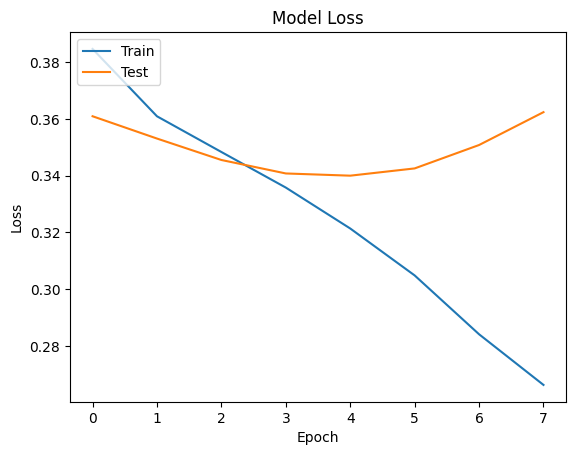

In [ ]:
# 학습 결과 시각화
plt.plot(train_losses)
plt.plot(test_losses)
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc="upper left")
plt.show()

### Embedding Layer의 가중치를 추출하고 정규화 (회귀 계수 뽑는 느낌? 나중에 행렬곱으로 유사도를 계산하는 것에 쓰임 - > SGD ALS 느낌)

In [ ]:
# CPU로 결과 확인할 때 사용하는 셀
model = RecommenderNet(n_users, n_recipes)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=start_lr)
scheduler = optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lrfn)

checkpoint_filepath = './Recipe/최종결과 저장용/no_change_weights.pth'

checkpoint = torch.load('./Recipe/최종결과 저장용/no_change_weights.pth', map_location=torch.device('cpu'))
model.load_state_dict(checkpoint['state_dict'])
optimizer.load_state_dict(checkpoint['optimizer'])
start_epoch = checkpoint['epoch']
best_loss = checkpoint['loss']
train_losses = checkpoint['train_loss_history']
test_losses = checkpoint['test_loss_history']

In [ ]:
def extract_weights(name, model):
    weight_layer = getattr(model, name)
    weights = weight_layer.weight.data
    norm = weights.norm(p=2, dim=1, keepdim=True)
    normalized_weights = weights.div(norm)
    return normalized_weights

# 모델에서 가중치 추출
recipe_weights = extract_weights('recipe_embedding', model)
user_weights = extract_weights('user_embedding', model)

## Data 결합

### Recipe Dataset 이용

In [ ]:
df = recipes_df

# Recipe ID나 이름을 입력으로 받아 해당하는 Recipe 정보가 담긴 DataFrame을 반환
def getRecipeFrame(recipe):
    if isinstance(recipe, int):
        return df[df.id == recipe]
    if isinstance(recipe, str):
        return df[df.name == recipe]

In [ ]:
weights = recipe_weights
weights.size()

torch.Size([231637, 64])

### Task1 : Finding Similar Recipes (Item Based Recommendation) (코사인 유사도)

In [ ]:
user_encoded2user = {i: x for i, x in enumerate(user_ids)}
recipe_encoded2recipe = {i: x for i, x in enumerate(recipe_ids)}

#pd.reset_option('all')
pd.set_option("max_colwidth", None)

# neg : 거리의 척도 (유사성, 비유사성)

def find_similar_recipes(name, n=10, return_dist=False, neg=False, sort_by=None, ascending=True):
    try:
        index = getRecipeFrame(name).id.values[0]
        encoded_index = recipe2recipe_encoded.get(index)
        weights = recipe_weights

        dists = torch.matmul(weights, weights[encoded_index])
        sorted_dists = torch.argsort(dists)

        n = n + 1

        if neg:
            closest = sorted_dists[:n]
        else:
            closest = sorted_dists[-n:]

        print('Recipes closest to {}'.format(name))

        if return_dist:
            return dists, closest

        SimilarityArr = []

        for close in closest:
            decoded_id = recipe_encoded2recipe.get(close.item())
            recipe_frame = getRecipeFrame(decoded_id.item())

            recipe_name = recipe_frame.name.values[0]
            description = recipe_frame.description.values[0]
            ingredients = recipe_frame.ingredients.values[0]
            n_ingredients = recipe_frame.n_ingredients.values[0]
            n_steps = recipe_frame.n_steps.values[0]
            minutes = recipe_frame.minutes.values[0]

            similarity = dists[close]
            SimilarityArr.append({"recipe_id": decoded_id, "name": recipe_name,
                                  "similarity": similarity,  "minutes": minutes,
                                  'description': description, "ingredients": ingredients, "n_ingredients": n_ingredients,
                                  'n_steps': n_steps})

        Frame = pd.DataFrame(SimilarityArr).sort_values(by="similarity", ascending=False)

        if sort_by and sort_by in ['n_steps', 'minutes']:
            Frame = Frame.sort_values(by=sort_by, ascending=ascending)

        return Frame[Frame.recipe_id != index].drop(['recipe_id'], axis=1)

    except Exception as e:
        print('{}! Not Found in Recipe list. Error: {}'.format(name, str(e)))

# This modified function now includes sorting options for 'n_steps' and 'minutes'.
# Note: This function assumes the existence of specific helper functions and data structures which are not defined here.


In [ ]:
user_encoded2user = {i: x for i, x in enumerate(user_ids)}
recipe_encoded2recipe = {i: x for i, x in enumerate(recipe_ids)}

#pd.reset_option('all')
pd.set_option("max_colwidth", 50)

# neg : 거리의 척도 (유사성, 비유사성)

def find_similar_recipes(name, n=10, return_dist=False, neg=False, sort_by=None, ascending=True):
    try:
        index = getRecipeFrame(name).id.values[0]
        encoded_index = recipe2recipe_encoded.get(index)
        weights = recipe_weights

        dists = torch.matmul(weights, weights[encoded_index])
        sorted_dists = torch.argsort(dists)

        n = n + 1

        if neg:
            closest = sorted_dists[:n]
        else:
            closest = sorted_dists[-n:]

        print('Recipes closest to {} '.format(name) )

        if return_dist:
            return dists, closest

        SimilarityArr = []

        for close in closest:
            decoded_id = recipe_encoded2recipe.get(close.item())
            recipe_frame = getRecipeFrame(decoded_id.item())

            recipe_name = recipe_frame.name.values[0]
            description = recipe_frame.description.values[0]
            ingredients = recipe_frame.ingredients.values[0]
            n_ingredients = recipe_frame.n_ingredients.values[0]
            n_steps = recipe_frame.n_steps.values[0]
            minutes = recipe_frame.minutes.values[0]

            similarity = dists[close]
            SimilarityArr.append({"recipe_id": decoded_id, "name": recipe_name,
                                  "similarity": similarity,  "minutes": minutes,
                                  'description': description, "ingredients": ingredients, "n_ingredients": n_ingredients,
                                  'n_steps': n_steps})

        Frame = pd.DataFrame(SimilarityArr).sort_values(by="similarity", ascending=False)

        if sort_by and sort_by in ['n_steps', 'minutes']:
            Frame = Frame.sort_values(by=sort_by, ascending=ascending)

        return Frame[Frame.recipe_id != index].drop(['recipe_id'], axis=1)

    except Exception as e:
        print('{}! Not Found in Recipe list. Error: {}'.format(name, str(e)))

# This modified function now includes sorting options for 'n_steps' and 'minutes'.
# Note: This function assumes the existence of specific helper functions and data structures which are not defined here.


In [ ]:
# 이름 복붙 용도
recipes_df["name"].head(50)

0            arriba   baked winter squash mexican style
1                      a bit different  breakfast pizza
2                             all in the kitchen  chili
3                                    alouette  potatoes
4                    amish  tomato ketchup  for canning
5                               apple a day  milk shake
6                                 aww  marinated olives
7                        backyard style  barbecued ribs
8                              bananas 4 ice cream  pie
9                               beat this  banana bread
10                          berry  good sandwich spread
11                        better than sex  strawberries
12                      better then bush s  baked beans
13                           boat house  collard greens
14                              calm your nerves  tonic
15                     chicken lickin  good  pork chops
16                                       chile rellenos
17                                       chinese

In [ ]:
find_similar_recipes(name = 'cookies by design   cookies on a stick', n=5, neg=False)

Recipes closest to cookies by design   cookies on a stick


,name,similarity,ingredients,description,n_ingredients,n_steps,minutes
4,sauteed brussels sprouts and red cabbage,"tensor(0.4874, device='cuda:0')","['brussels sprout', 'salt', 'butter', 'red cabbage', 'kosher salt', 'black pepper']","saw this recipe while watching a food network show on thanksgiving. the brussel sprouts stay bright green in this recipe, and this alongside the red cabbage makes a beautiful presentation. the veggie flavors really shine through here.",6,15,25
3,polish tuna melt sandwich,"tensor(0.4821, device='cuda:0')","['canned tuna', 'red onion', 'green olives', 'mayonnaise', 'pepperoncini juice', 'provolone cheese', 'italian bread']","there i was, a lunch to make, and a can of tuna in my hand. i don't know what got into me, but i just wasn't ready for the same old tuna salad sandwiches. i opened the fridge, and here's the result. try other ingredients, ie fontina cheese, pepperonconi, sliced tomato. yeah...before you say it...i know this sounds italian, but i'm part polish...so there!",7,6,19
2,a1 chicken thighs en croute on a bed of dijon cooked spinach a1,"tensor(0.4820, device='cuda:0')","['puff pastry', 'boneless skinless chicken thighs', 'spinach', 'dijon mustard', 'a.1. original sauce']",a.1. original sauce recipe contest entry. a1 steak sauce and dijon create a delicate flavor for these en croute chicken thighs. this pocket of deliciousness on a bed of spinach cooked with dijon and a1 steak sauce is a tasty and balanced meal.,5,9,65
1,3 way tex mex chicken oamc,"tensor(0.4767, device='cuda:0')","['diced tomatoes with jalapenos', 'salsa verde', 'ground cumin', 'minced garlic cloves', 'salt', 'black pepper', 'boneless skinless chicken thighs', 'red pepper', 'yellow pepper', 'onion', 'black beans', 'corn']","chicken can be used to make tacos, quesadilla or burritos - easily makes a bunch for multiple meals.",12,10,255
0,famous miami cuban sandwich,"tensor(0.4674, device='cuda:0')","['boneless pork roast', 'garlic', 'parsley', 'paprika', 'ground cumin', 'ground black pepper', 'salt', 'lime juice', 'light corn syrup', 'olive oil', 'rolls', 'smoked ham', 'swiss cheese', 'dill pickles', 'butter']",a taste of miami on your dinner table! you can smell these sandwiches cooking all over miami beach. taking a walk down there is something to experience. this recipe is a taste of heaven on a roll. this recipe makes 6 whole sandwiches and serves 12. they are large and should be cut in half. recipe time does not include the 6-24 marination time for the roast pork. you will need the cuban roll for this sandwich. you can find the authentic cubano roll recipe here: recipe #320725,15,20,50


In [ ]:
find_similar_recipes(name = 'cookies by design   cookies on a stick', n=5, neg=False, sort_by='n_steps', ascending =True)

Recipes closest to cookies by design   cookies on a stick


,name,similarity,ingredients,description,n_ingredients,n_steps,minutes
3,polish tuna melt sandwich,"tensor(0.4821, device='cuda:0')","['canned tuna', 'red onion', 'green olives', 'mayonnaise', 'pepperoncini juice', 'provolone cheese', 'italian bread']","there i was, a lunch to make, and a can of tuna in my hand. i don't know what got into me, but i just wasn't ready for the same old tuna salad sandwiches. i opened the fridge, and here's the result. try other ingredients, ie fontina cheese, pepperonconi, sliced tomato. yeah...before you say it...i know this sounds italian, but i'm part polish...so there!",7,6,19
2,a1 chicken thighs en croute on a bed of dijon cooked spinach a1,"tensor(0.4820, device='cuda:0')","['puff pastry', 'boneless skinless chicken thighs', 'spinach', 'dijon mustard', 'a.1. original sauce']",a.1. original sauce recipe contest entry. a1 steak sauce and dijon create a delicate flavor for these en croute chicken thighs. this pocket of deliciousness on a bed of spinach cooked with dijon and a1 steak sauce is a tasty and balanced meal.,5,9,65
1,3 way tex mex chicken oamc,"tensor(0.4767, device='cuda:0')","['diced tomatoes with jalapenos', 'salsa verde', 'ground cumin', 'minced garlic cloves', 'salt', 'black pepper', 'boneless skinless chicken thighs', 'red pepper', 'yellow pepper', 'onion', 'black beans', 'corn']","chicken can be used to make tacos, quesadilla or burritos - easily makes a bunch for multiple meals.",12,10,255
4,sauteed brussels sprouts and red cabbage,"tensor(0.4874, device='cuda:0')","['brussels sprout', 'salt', 'butter', 'red cabbage', 'kosher salt', 'black pepper']","saw this recipe while watching a food network show on thanksgiving. the brussel sprouts stay bright green in this recipe, and this alongside the red cabbage makes a beautiful presentation. the veggie flavors really shine through here.",6,15,25
0,famous miami cuban sandwich,"tensor(0.4674, device='cuda:0')","['boneless pork roast', 'garlic', 'parsley', 'paprika', 'ground cumin', 'ground black pepper', 'salt', 'lime juice', 'light corn syrup', 'olive oil', 'rolls', 'smoked ham', 'swiss cheese', 'dill pickles', 'butter']",a taste of miami on your dinner table! you can smell these sandwiches cooking all over miami beach. taking a walk down there is something to experience. this recipe is a taste of heaven on a roll. this recipe makes 6 whole sandwiches and serves 12. they are large and should be cut in half. recipe time does not include the 6-24 marination time for the roast pork. you will need the cuban roll for this sandwich. you can find the authentic cubano roll recipe here: recipe #320725,15,20,50


In [ ]:
find_similar_recipes(name = 'chinese  candy', n=5, neg=False)

Recipes closest to chinese  candy


,name,similarity,ingredients,description,n_ingredients,n_steps,minutes
4,homemade mascarpone cheese,"tensor(0.5191, device='cuda:0')","['heavy whipping cream', 'lemon juice']","creamy, silky smooth mascarpone cheese that you can make at home instead of paying an arm and a leg for store-bought! this is the perfect introduction to cheesemaking for the beginner, no hard-to-find ingredients, super easy to make, and very rewarding! use this in tiramisu or other italian desserts.",2,11,40
3,cumin and saffron rice,"tensor(0.5159, device='cuda:0')","['canola oil', 'black cumin seeds', 'basmati rice', 'water', 'salt', 'warm water']",from sallybernstein.com.\r\nzaffrani chaval is its original indian name. this is the standard rice lachu serves at ajanta. it would serve nicely as a side dish to non-indian dishes as well.,6,9,35
2,dill and sour cream potato salad,"tensor(0.5133, device='cuda:0')","['baby red potatoes', 'mayonnaise', 'sour cream', 'fresh dill', 'fresh parsley', 'salt and pepper']","a different twist on ""traditional"" potato salad, this one is simple to make and delicious to eat. cooking time includes overnight refrigeration.",6,5,605
1,crunch top apple pie paula deen,"tensor(0.5097, device='cuda:0')","['pastry for double-crust pie', 'sugar', 'all-purpose flour', 'ground cinnamon', 'salt', 'cooking apples', 'lemon juice', 'applesauce', 'butter']",saw paula deen make this on food tv and i was sold. the addition of applesauce to the pie filling makes it a perfect apple pie. i may never try another apple pie recipe! mmmmmm.,9,14,70
0,deep dish pizza with sausage garlic and mozzarella,"tensor(0.5067, device='cuda:0')","['olive oil', 'pizza dough', 'mild italian sausage', 'mozzarella cheese', 'garlic cloves', 'pizza sauce', 'parmesan cheese']",a husband favorite,7,22,75


In [ ]:
find_similar_recipes(name = 'crispy crunchy  chicken', n=5, neg=False, sort_by='minutes', ascending = True)

Recipes closest to crispy crunchy  chicken with less minute


,name,similarity,minutes,description,ingredients,n_ingredients,n_steps
1,broccoli with browned butter,"tensor(0.5013, device='cuda:0')",17,simply delicious.,"['broccoli', 'butter', 'garlic', 'lemon juice']",4,9
3,polish potato salad,"tensor(0.5092, device='cuda:0')",25,this is from my taste of home cookbook and its very good. i think its quite a twist on potato salad.,"['red potatoes', 'bratwursts', 'kielbasa', 'butter', 'sugar', 'all-purpose flour', 'salt', 'ground mustard', 'celery seed', 'chicken broth', 'cider', 'red onion', 'celery', 'parsley']",14,12
4,ginger chicken stir fry,"tensor(0.5102, device='cuda:0')",27,"here's a great stir fry that goes good over rice, or thin angel hair pasta. sometimes i add toasted sliced almonds.","['oil', 'boneless chicken', 'celery', 'carrot', 'sugar snap peas', 'onion', 'garlic', 'chicken broth', 'cornstarch', 'soy sauce', 'dried ginger']",11,11
0,bow tie taco casserole,"tensor(0.4873, device='cuda:0')",50,a casserole your family will love.,"['ground beef', 'ground pork', 'taco seasoning mix', 'green pepper', 'tomato sauce', 'diced tomatoes', 'bow tie pasta', 'monterey jack cheese', 'sour cream']",9,11
2,linda s standing rib roast,"tensor(0.5020, device='cuda:0')",125,"serve with garlic mashed potatoes, brown sugar glazed carrots, coleslaw and rolls and you'll have a meal fit for a ""king""!","['rib roast', 'garlic powder', 'onion']",3,5


In [ ]:
find_similar_recipes(name = 'crispy crunchy  chicken', n=5, neg=False)

Recipes closest to crispy crunchy  chicken


,name,similarity,minutes,description,ingredients,n_ingredients,n_steps
4,ginger chicken stir fry,"tensor(0.5102, device='cuda:0')",27,"here's a great stir fry that goes good over rice, or thin angel hair pasta. sometimes i add toasted sliced almonds.","['oil', 'boneless chicken', 'celery', 'carrot', 'sugar snap peas', 'onion', 'garlic', 'chicken broth', 'cornstarch', 'soy sauce', 'dried ginger']",11,11
3,polish potato salad,"tensor(0.5092, device='cuda:0')",25,this is from my taste of home cookbook and its very good. i think its quite a twist on potato salad.,"['red potatoes', 'bratwursts', 'kielbasa', 'butter', 'sugar', 'all-purpose flour', 'salt', 'ground mustard', 'celery seed', 'chicken broth', 'cider', 'red onion', 'celery', 'parsley']",14,12
2,linda s standing rib roast,"tensor(0.5020, device='cuda:0')",125,"serve with garlic mashed potatoes, brown sugar glazed carrots, coleslaw and rolls and you'll have a meal fit for a ""king""!","['rib roast', 'garlic powder', 'onion']",3,5
1,broccoli with browned butter,"tensor(0.5013, device='cuda:0')",17,simply delicious.,"['broccoli', 'butter', 'garlic', 'lemon juice']",4,9
0,bow tie taco casserole,"tensor(0.4873, device='cuda:0')",50,a casserole your family will love.,"['ground beef', 'ground pork', 'taco seasoning mix', 'green pepper', 'tomato sauce', 'diced tomatoes', 'bow tie pasta', 'monterey jack cheese', 'sour cream']",9,11


In [ ]:
find_similar_recipes(name = 'fried  potatoes', n=5, neg=False)

Recipes closest to fried  potatoes


,name,similarity,ingredients,description,n_ingredients,n_steps,minutes
4,classic baked spaghetti,"tensor(0.5506, device='cuda:0')","['thin spaghetti', 'ground beef', 'garlic', 'spaghetti sauce', 'mild cheddar cheese', 'oregano']","i looked everywhere for an easy baked spaghetti that did not use mushrooms or cream of mushroom soup (husband is allergic). i am happy to say i found it. you could add mushrooms, green pepper, olives, etc. to this dish for added variety, but i like it just the way it is! this makes a great family meal...just add a tossed salad and some garlic bread, and dinner is ready in about an hour.",6,11,55
3,fancy pasta or potato salad,"tensor(0.5413, device='cuda:0')","['ditalini', 'cooked bacon', 'celery', 'green peppers', 'onion', 'dill relish', 'dill weed', 'mayonnaise', 'ketchup', 'chili powder', 'worcestershire sauce', 'salt', 'black pepper', 'sugar']",this recipe can either be made with your favorite macaroni shape pasta or you can use for a tasty pototo salad. i got this recipe from the southern magazine years ago when i first started cooking. i just changed the elbow macaroni to the ditalini (small tube shape) macaroni and added dill relish.,14,11,25
2,pesto artichoke chicken over rice,"tensor(0.5154, device='cuda:0')","['boneless skinless chicken breasts', 'converted rice', 'chicken broth', 'artichoke hearts', 'basil pesto', 'condensed cream of chicken soup', 'salt', 'pepper']","this is an adaptation of my artichoke chicken with rice recipe (#183814). the pesto saves time on mixing up seasonings, and lends a wonderfully rich flavor to the rice. please note: due to comments on this and my similar recipe i've noted that you need to use converted or brown rice for this to turn out right.",8,8,320
1,nut crusted portobello mushroom strips,"tensor(0.5146, device='cuda:0')","['portabella mushrooms', 'almonds', 'parmesan cheese', 'salt', 'black pepper', 'garlic powder', 'eggs', 'olive oil', 'salsa']","thin strips of meaty portobello mushrooms with a crunchy nut coating, sauted in olive oil, become wonderfully satisfying! a great breakfast entree, or side dish, or snack! adapted from mollie katzen's sunlight cafe(breakfast all day).",9,24,30
0,pistachio crusted salmon,"tensor(0.5035, device='cuda:0')","['salmon steaks', 'seafood', 'pistachios', 'extra virgin olive oil', 'butter', 'lemon']","another lovely way to cook a lovely fish! you can use different nuts such as walnuts, hazelnuts, almonds etc. you may also use a different fish such as chilean sea bass, trout etc. seafood magic is a seasoning by chef paul prudhomme. get his seasonings if you can find them - they are to die for! you may sub old bay instead but it wont have the same flavor, though still fantastic!",6,7,20


In [ ]:
find_similar_recipes(name = 'italian sandwich  pasta salad', n=10, neg=False)

Recipes closest to italian sandwich  pasta salad 


,name,similarity,minutes,description,ingredients,n_ingredients,n_steps
9,crock pot southwest country style ribs,"tensor(0.5450, device='cuda:0')",515,nicely spiced southwestern dish with the flavo...,"['dried new mexico chiles', 'boiling water', '...",11,12
8,honey curry chicken,"tensor(0.5148, device='cuda:0')",70,"this is my family's favorite dish, i usually d...","['chicken', 'margarine', 'prepared mustard', '...",6,5
7,hamburger venison sandwich meat,"tensor(0.5044, device='cuda:0')",75,"wonderful flavor, not too spicy. keeps for a w...","['hamburger', 'morton tender quick salt', 'mus...",8,4
6,ham and string green bean soup,"tensor(0.5019, device='cuda:0')",135,this is a fantastic way to use up the leftover...,"['ham', 'onion', 'carrots', 'celery', 'potatoe...",11,6
5,sea scallops with sauce meuniere,"tensor(0.4934, device='cuda:0')",15,"delectable pan-seared sea scallops, with a cla...","['sea scallops', 'butter', 'green onions', 'ga...",9,10
4,mozzarella tomato and basil quiche,"tensor(0.4823, device='cuda:0')",50,"the mediterranean flavours of mozzarella, toma...","['shortcrust pastry dough', 'eggs', 'heavy cre...",7,12
3,chewy gingersnaps sparkle cookies,"tensor(0.4812, device='cuda:0')",20,"these cookies are chewy, delicious and easy to...","['butter', 'sugar', 'eggs', 'molasses', 'vanil...",12,10
2,chicken sausage pasta with basil and wine,"tensor(0.4810, device='cuda:0')",30,i came up with this one night when the cupboar...,"['chicken sausage', 'pasta', 'olive oil', 'gar...",14,10
1,vegetable lasagna neomonde,"tensor(0.4769, device='cuda:0')",100,neomonde is a popular middle eastern restauran...,"['vegetable oil', 'yellow onion', 'garlic clov...",21,19
0,low fat creamy italian salad dressing,"tensor(0.4738, device='cuda:0')",5,a recipe from www.mizfrogspad.com that i adapt...,"['fat free greek yogurt', 'red wine vinegar', ...",10,1


### Task 2: Finding Similar Users (User Based Recommendation)

In [ ]:
# random user 특정
ratings_per_user = rating_df.groupby('user_id').size()
random_user = ratings_per_user[ratings_per_user > 10].sample(1, random_state=None).index[0] # 평가를 10개 이상한 사람
print('> user_id:', random_user)

> user_id: 1344790


In [ ]:
ratings_per_user[random_user]

14

In [ ]:
def find_similar_users(item_input, n=10,return_dist=False, neg=False):
    try:
        index = item_input
        encoded_index = user2user_encoded.get(index)
        weights = user_weights

        dists = torch.matmul(weights, weights[encoded_index])

        sorted_dists = torch.argsort(dists)



        n = n + 1

        if neg:
            closest = sorted_dists[:n]
        else:
            closest = sorted_dists[-n:]

        print('> users similar to #{}'.format(item_input))

        if return_dist:
            return dists, closest

        rindex = df
        SimilarityArr = []

        ## tensor 이므로 close.item(), decoded_id.item() 이런식으로 써야함
        for close in closest:
            similarity = dists[close.item()]

            if isinstance(item_input, int):
                decoded_id = user_encoded2user.get(close.item())
                SimilarityArr.append({"similar_users": decoded_id.item(),
                                      "similarity": similarity})

        Frame = pd.DataFrame(SimilarityArr).sort_values(by="similarity",
                                                        ascending=False)

        return Frame

    except:
        print('{}!, Not Found in User list'.format(name))

In [ ]:
similar_users = find_similar_users(int(random_user), n=10, neg=False)

# similar_users = similar_users[similar_users.similarity > 0.4]
similar_users = similar_users[similar_users.similar_users != random_user]
similar_users.head(10)

> users similar to #1344790


,similar_users,similarity
9,331880,"tensor(0.5499, device='cuda:0')"
8,840195,"tensor(0.5264, device='cuda:0')"
7,620081,"tensor(0.5223, device='cuda:0')"
6,108367,"tensor(0.5150, device='cuda:0')"
5,2002357459,"tensor(0.5133, device='cuda:0')"
4,609761,"tensor(0.5111, device='cuda:0')"
3,2467858,"tensor(0.5064, device='cuda:0')"
2,481762,"tensor(0.4974, device='cuda:0')"
1,1085085,"tensor(0.4956, device='cuda:0')"
0,1528337,"tensor(0.4913, device='cuda:0')"


### Task 3 -> 유사한 사용자를 뽑아서, 그 사람들이 선호하는 애니메이션을 추천 (협업필터링)

In [ ]:
rating_df[rating_df.user_id == random_user]

,user_id,recipe_id,rating,review,user,recipe
1004184,1344790,122878,1.0,My whole family loved this! I added 1/4 tsp. of cinnamon to the topping mixture and baked it for about 5 minutes longer than suggested. We ate it with whipped cream on top. It was delicious!,84499,204792
314517,1344790,36232,0.8,"This is a hearty and toothsome cookie - just the kind my family likes. I made some substitutions: used egg substitute, unsweetened strawberry applesauce (it was all I had on hand), pecans instead of walnuts, and instead of the raisins I used 1/2 cup mini chocolate chips. Very tasty! Made 28 cookies.",84499,63577
299247,1344790,48013,1.0,Moist and delicious! I cut the recipe in half and it turned out two perfect loaves. Thanks for sharing.,84499,60266
442600,1344790,182247,1.0,"This was very quick and easy to make - and also delicious. We have an abundance of blueberries, and this was a nice recipe to add to my collection to use them up! Thanks for sharing.",84499,89600
698834,1344790,102176,1.0,"So delicious! I left out the Splenda, and stirred in 1/4 cup fat free milk after cooking. Couldn't believe how good it was! Thanks for posting!",84499,141827
996727,1344790,155564,1.0,Very tasty and easy to make! We enjoyed these very much. I love the coconut and used old-fashioned rolled oats and that made them nice and chewy. Thanks for sharing this recipe.,84499,203068
1042724,1344790,238720,1.0,These are very good! I used 3 cups of blackberries and an extra tablespoon of sugar for the filling.,84499,212921
738971,1344790,155456,1.0,These are so good and very easy to make. Mine took about 11 minutes to bake and came out perfectly. Thanks for a great recipe.,84499,150087
344459,1344790,222188,1.0,"Yum! This is a very good buttercream! I used salted butter & 3 cups of powdered sugar, and it came out excellent. I spread it over Recipe #26370 (chocolate cake) that I made in an 9x13 pan, then sprinkled on some mini chocolate chips. :-)",84499,69467
1077960,1344790,100281,1.0,I made a double recipe of this yesterday and made one DEEP dish blueberry pie! We have 20 pounds of wild blueberries to use up! The problem I've always had in the past with making berry pies is that they end up kind of runny. I didn't have that problem with this recipe...it turned out perfect. Thanks!,84499,220317


In [ ]:
def get_user_preferences(user_id, plot=False, verbose=0):
    recipes_watched_by_user = rating_df[rating_df.user_id==user_id]
    # 사용자가 평가한 레시피들의 평점이 상위 25%에 해당하는 기준 값을 찾습니다.
    user_rating_percentile = np.percentile(recipes_watched_by_user.rating, 75)
    recipes_watched_by_user = recipes_watched_by_user[recipes_watched_by_user.rating >= user_rating_percentile]
    top_recipes_user = (
        recipes_watched_by_user.sort_values(by="rating", ascending=False).recipe_id.values)
    # 선정된 레시피 정렬 및 추출
    recipe_df_rows = df[df["id"].isin(top_recipes_user)]

    if verbose != 0:
        print("> User #{} has rated {} recipes (avg. rating = {:.1f})".format(
          user_id, len(recipes_watched_by_user),
          recipes_watched_by_user['rating'].mean(),
        ))

    return recipe_df_rows#.eng_version.values

user_pref = get_user_preferences(random_user, plot=True, verbose=1)

> User #1344790 has rated 13 recipes (avg. rating = 1.0)


In [ ]:
## 5점이 너무 많다...

rating_df[rating_df['user_id'] == random_user]

,user_id,recipe_id,rating,review,user,recipe
440217,51199,72608,1.0,"This was a huge hit. I thought that it would taste extremely sweet, but somehow it didn't - it was just right. Instead of the chocolate chips I melted some Cadburys hazelenut milk chocolate and spread it on top of the crispies. Delicious.",3305,89025
700692,51199,91423,1.0,Delicious. I looked at my sour cream and condensed milk and knew it wouldn't set (I'd used low fat versions of both) so added an egg and everything set beautifully. Thanks for sharing this.,3305,142175
400284,51199,32382,1.0,"This recipe certainly lives up to it's name. The only things I did differently were to add 1/2 tsp of minced garlic and to roll the finished cheese ball in paprika and then the walnuts. It tasted fabulous and the pineapple added an extra something. This looked extremely decorative on the plate too. I'll definitely make this one again - thanks, Kim.",3305,80865
462628,51199,43367,1.0,I loved this recipe. The combination of the pan fried sage and the bacon is wonderful (I used pancetta in mine). Thanks so much for sharing this one.,3305,94181
303902,51199,136423,1.0,We loved this recipe and will definitely make this again. Thanks a lot.,3305,61394
...,...,...,...,...,...,...
617092,51199,95003,1.0,"Such a delicious carrot soup recipe Carla! I followed the directions as written, the only difference being that my carrots took a lot longer to cook (perhaps because they were local and organic, I don't know). Everyone loved this recipe and I can see I'll be making it again and again. Thankyou.",3305,125685
382750,51199,25885,1.0,I added two tablespoons of cocoa to this ecipe and it tasted delicious. A great way of using over the top bananas and the kids loved it. Thankyou.,3305,72929
398443,51199,184466,0.8,Fun and quick and easy to make. The pesto was good but you could vary the recipe using lots of different combinations. They look very pretty as part of a Christmas buffet. Thanks for this one as it looked like I'd made a lot of effort (when I hadn't - I love those kind of recipes!).,3305,80392
1001447,51199,116476,1.0,A wonderful recipe. Every member of the family ate it all up and it would be great as part of a celebration buffet. Many thanks.,3305,204172


In [ ]:
print('> recipes highly rated by this user')
pd.DataFrame(user_pref).name

> recipes highly rated by this user


5084                         amy s chocolate chip zucchini bread
24810                                  blackberry breakfast bars
25998                                     blueberry crumble cake
26035                                 blueberry filling for pies
50872                              chocolate macaroons   no bake
59464                                   couscous with pistachios
66687          crock pot chicken with black beans   cream cheese
104367            heavenly banana oatmeal chocolate chip cookies
156366                    peanut butter hershey s kisses cookies
167170                                           pumpkin oatmeal
187337                                 simple strawberry cobbler
212911                                   thick chocolate pudding
220415    vanilla  buttercream frosting  from sprinkles cupcakes
Name: name, dtype: object

In [ ]:
## similar_users에서 각 사용자 ID(user_id)에 대해 get_user_preferences 함수를 호출하여 해당 사용자의 선호도 목록을 가져옵니다.
## 현재 사용자(user_pref)가 이미 선호하는 애니메이션을 제외합니다.

## 유사한 사용자들이 선호하는 애니메이션 목록을 하나의 데이터프레임(anime_list)으로 결합합니다.
## 이 목록을 빈도수에 따라 정렬하여 가장 인기 있는 애니메이션 상위 n개를 선정합니다.

def get_recommended_recipes(similar_users, n=10):
    recommended_recipes = []
    recipe_list = []

    for user_id in similar_users.similar_users.values:
        pref_list = get_user_preferences(int(user_id), verbose=0)
        recipe_list.append(pref_list.name.values)

    recipe_list = pd.DataFrame(recipe_list)
    sorted_list = pd.DataFrame(pd.Series(recipe_list.values.ravel()).value_counts()).head(n)


    for i, recipe_name in enumerate(sorted_list.index):
        n_user_pref = sorted_list[sorted_list.index == recipe_name].values[0][0]
        if isinstance(recipe_name, str):
            try:
                frame = getRecipeFrame(recipe_name)
                recipe_id = frame.id.values[0]
                description = frame.description.values[0]
                minutes = frame.minutes.values[0]
                tags = frame.tags.values[0]
                nutrition = frame.nutrition.values[0]
                n_steps = frame.n_steps.values[0]
                ingredients = frame.ingredients.values[0]
                steps = frame.steps.values[0]
                recommended_recipes.append({"n": n_user_pref, "recipe_name": recipe_name, "description": description, "minutes": minutes, "tags": tags, "nutrition": nutrition, "steps": steps, "n_steps": n_steps, "ingredients": ingredients})
            except:
                pass

    return pd.DataFrame(recommended_recipes)
recommended_recipe = get_recommended_recipes(similar_users, n=10)

print('\n> Top recommendations for user: {}'.format(random_user))
recommended_recipe


> Top recommendations for user: 1344790


,n,recipe_name,description,minutes,tags,nutrition,steps,n_steps,ingredients
0,1,autumn pasta with pumpkin and sausage,NaN,30,"['30-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'main-dish', 'pasta', 'american', 'easy', 'european', 'fall', 'holiday-event', 'italian', 'stove-top', 'dietary', 'one-dish-meal', 'seasonal', 'comfort-food', 'pasta-rice-and-grains', 'taste-mood', 'equipment']","[1005.4, 69.0, 23.0, 67.0, 67.0, 92.0, 35.0]","['heat a large skillet to mh heat', 'add 1 t olive oil , then brown sausage', 'transfer sausage to plate lined with paper towels to drain fat , set aside', 'drain fat from skillet , return skillet to stove', 'add 1 t olive oil , garlic and onion', 'saute 3-5 minutes , until tender', 'add bay , sage , and wine to the pan , stir and incorperate sausage drippings from bottom of the pan', 'reduce wine by half , then add stock and pumpkin , stir', 'when mixture comes to a bubble , add sausage to pan , reduce heat and add cream', 'season with cinnamon , nutmeg , salt and pepper', 'simmer 5-10 minutes', 'pour pasta into sauce and stir', 'add cheese and sage to garnish']",13,"['extra virgin olive oil', 'sweet italian sausage link', 'garlic', 'onion', 'bay leaves', 'fresh sage', 'dry white wine', 'chicken stock', 'canned pumpkin', 'heavy cream', 'cinnamon', 'ground nutmeg', 'salt and pepper', 'penne', 'parmesan cheese']"
1,1,wasabi salmon cakes,these are amazing. my husband couldn't believe i made them the first time we ate these. these are truly restaurant quality and so easy too! this recipe was given to me by an online friend.,25,"['30-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'lunch', 'main-dish', 'seafood', 'american', 'easy', 'beginner-cook', 'dinner-party', 'salmon', 'fish', 'stove-top', 'comfort-food', 'inexpensive', 'northeastern-united-states', 'saltwater-fish', 'brunch', 'taste-mood', 'equipment', 'number-of-servings']","[125.6, 6.0, 3.0, 42.0, 34.0, 4.0, 1.0]","['mush the top ingredients together in a big bowl', 'adding extra breadcrumbs till the texture is workable', 'roll into balls and flatten into patties', 'press the patties into the extra breadcrumbs', 'spray tops with pam , flip and spray bottoms', 'cook in large skillet over medium-high heat until nice and brown and firm to the touch', 'you can use the same technique with tuna', 'i like that to have an italian flavor , so i take out the wasabi and soy and add basil and oregano and shredded mozzarella', 'they are great with pasta sauce']",9,"['salmon', 'low-fat mayonnaise', 'plain breadcrumbs', 'egg', 'wasabi', 'tamari', 'rice vinegar', 'red bell pepper', 'breadcrumbs', 'cooking spray']"
2,1,sweet spicy cashew chicken,"this is a fabulous stirfry - a little sweet, a little (or a lot!) hot, and loaded with veggies and chicken! yum! this is my adaptation of a recipe from the best of bridge cookbook series - a great set of cookbooks!",25,"['30-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'szechuan', 'lunch', 'main-dish', 'poultry', 'asian', 'chinese', 'chicken', 'one-dish-meal', 'stir-fry', 'meat', 'chicken-breasts', 'technique']","[518.3, 45.0, 66.0, 46.0, 66.0, 26.0, 11.0]","['combine sauce ingredients in a bowl and set aside', 'in a large plastic resealable baggie , combine cornstarch , sugar and salt', 'add chicken chunks , seal baggie and shake to coat chicken in cornstarch mixture', 'heat wok or large frying pan on high and add oil', 'heat to hot , but not smoking', 'add chicken pieces , garlic , ginger and onion , stirring until chicken is lightly cooked on the outside', 'add bell pepper , mushrooms , and carrots', 'stir 2-3 minutes until softened', 'add snow peas and sauce , cooking until sauce comes to a boil', 'add cashews and sprinkle with sesame seeds', ""serve immediately , over rice if you'd like-- yum !""]",11,"['ketchup', 'low sodium so

In [ ]:
# 6개만 나오는 이유 : 하나만 평가한 사람이 너무 많음..

## Ranking Based Recommendation

In [ ]:
pd.set_option("max_colwidth", 50)
# PyTorch 예측 함수
def predict(model, user_recipe_array):
    model.eval()  # 평가 모드로 설정
    device = next(model.parameters()).device  # 모델의 디바이스 확인

    with torch.no_grad():  # 그래디언트 계산 비활성화
        user_recipe_tensor = torch.LongTensor(user_recipe_array).to(device)
        predictions = model(user_recipe_tensor[:,0], user_recipe_tensor[:,1])
    return predictions

# 기존 코드
print("Showing recommendations for user: {}".format(random_user))
print("===" * 25)

recipes_watched_by_user = rating_df[rating_df.user_id == random_user]
recipe_not_watched_df = df[
    ~df["id"].isin(recipes_watched_by_user.recipe_id.values)
]

recipe_not_watched = list(
    set(recipe_not_watched_df['id']).intersection(set(recipe2recipe_encoded.keys()))
)

recipe_not_watched = [[recipe2recipe_encoded.get(x)] for x in recipe_not_watched]

user_encoder = user2user_encoded.get(random_user)

user_recipe_array = np.hstack(([[user_encoder]] * len(recipe_not_watched), recipe_not_watched))


# PyTorch 예측 부분
ratings = predict(model, user_recipe_array).flatten()

top_ratings_indices = (-ratings).argsort()[3:50]

recommended_recipe_ids = [
    recipe_encoded2recipe.get(recipe_not_watched[x][0]) for x in top_ratings_indices
]

Results = []
top_rated_ids = []

for index, recipe_id in enumerate(recipe_not_watched):
    rating = ratings[index]
    id_ = recipe_encoded2recipe.get(recipe_id[0])

    if id_ in recommended_recipe_ids:
        top_rated_ids.append(id_)
        try:
            condition = (df.id == id_)
            # name = df[condition]['eng_version'].values[0]
            name = df[condition].name.values[0]
            tags = df[condition].tags.values[0]
            description = df[condition].description.values[0]
            minutes = df[condition].minutes.values[0]
            nutrition = df[condition].nutrition.values[0]
            n_steps = df[condition].n_steps.values[0]
            ingredients = df[condition].ingredients.values[0]
            steps = df[condition].steps.values[0]


        except:
            continue



        Results.append({"name" : name, "pred_rating": rating, "tags": tags, "description": description, "minutes": minutes, "tags": tags, "nutrition": nutrition, "steps": steps, "n_steps": n_steps, "ingredients": ingredients})


print("---" * 25)
print("> Top 10 recipe recommendations")
print("---" * 25)

Results = pd.DataFrame(Results).sort_values(by='pred_rating', ascending=False)

Results

Showing recommendations for user: 1344790
---------------------------------------------------------------------------
> Top 10 recipe recommendations
---------------------------------------------------------------------------


,name,pred_rating,tags,description,minutes,nutrition,steps,n_steps,ingredients
32,easy chocolate trifle,"tensor(0.9971, device='cuda:0')","['60-minutes-or-less', 'time-to-make', 'course...",this trifle is so easy to throw together for a...,50,"[625.7, 48.0, 124.0, 20.0, 15.0, 78.0, 28.0]","['first layer', 'prepare brownie as directed o...",13,"['brownie mix', 'miniature chocolate chips', '..."
31,southern snow cream,"tensor(0.9971, device='cuda:0')","['15-minutes-or-less', 'time-to-make', 'course...",the only dish my hubby ever taught me to make....,8,"[324.6, 13.0, 217.0, 5.0, 15.0, 27.0, 18.0]","['gather fresh , clean snow in a large bowl or...",8,"['snow', 'sweetened condensed milk', 'vanilla'..."
25,chocolate sauce or frosting,"tensor(0.9970, device='cuda:0')","['15-minutes-or-less', 'time-to-make', 'course...",adopted from the recipezaar account. apparentl...,15,"[800.7, 86.0, 268.0, 5.0, 14.0, 175.0, 28.0]","['in a double boiler or heavy saucepan , melt ...",7,"['heavy cream', 'unsalted butter', 'granulated..."
46,shrimp coconut soup rsc,"tensor(0.9969, device='cuda:0')","['weeknight', '15-minutes-or-less', 'time-to-m...","""ready, set, cook! hidden valley contest entry...",13,"[491.8, 43.0, 4.0, 16.0, 40.0, 96.0, 15.0]",['heat half the oil over medium-high heat unti...,15,"['vegetable oil', 'medium shrimp', 'curry powd..."
40,3 pack pot roast,"tensor(0.9968, device='cuda:0')","['course', 'main-ingredient', 'preparation', '...",this is a recipe i found and tweaked a bit. m...,430,"[118.1, 0.0, 14.0, 11.0, 5.0, 0.0, 8.0]","['place the meat in the slow cooker', 'in a sm...",9,"['beef roast', 'brown gravy mix', 'italian sal..."
44,company s coming mashed potatoes,"tensor(0.9968, device='cuda:0')","['60-minutes-or-less', 'time-to-make', 'course...","""ready, set, cook! special edition contest ent...",40,"[185.3, 24.0, 5.0, 14.0, 17.0, 47.0, 0.0]","['preheat the oven to 350 degrees , and grease...",11,['simply potatoes traditional mashed potatoes'...
8,graham cracker oatmeal crust,"tensor(0.9967, device='cuda:0')","['30-minutes-or-less', 'time-to-make', 'course...",oats stirred into graham cracker crumbs make t...,17,"[1484.2, 116.0, 355.0, 52.0, 35.0, 196.0, 62.0]","['preheat oven to 350', 'process crackers in f...",8,"['graham crackers', 'unsalted butter', 'old fa..."
37,crispy breaded and baked chicken wings,"tensor(0.9966, device='cuda:0')","['60-minutes-or-less', 'time-to-make', 'course...",i like my wings baked and not fried. these ar...,45,"[73.1, 6.0, 1.0, 2.0, 10.0, 6.0, 0.0]","['in a large resealable plastic bag , combine ...",7,"['breadcrumbs', 'onion powder', 'dried basil',..."
26,flan,"tensor(0.9965, device='cuda:0')","['time-to-make', 'course', 'main-ingredient', ...","my family loves flan, i usually bake it in a r...",70,"[261.5, 11.0, 150.0, 3.0, 14.0, 17.0, 14.0]","['preheat oven to 325f', 'prepare an ice bath ...",29,"['sugar', 'water', 'milk', 'egg yolks', 'eggs'..."
42,ww greek inspired scrambled egg wraps,"tensor(0.9965, device='cuda:0')","['weeknight', '30-minutes-or-less', 'time-to-m...",i came up with this as an alternative to mexic...,20,"[382.8, 25.0, 23.0, 27.0, 38.0, 22.0, 13.0]",['spray a non-stick skillet with a little cook...,13,"['low-fat cooking spray', 'red onion', 'zucchi..."


## 문제점 모음


In [ ]:
# 1. 하나만 평가한 사람이 많다..
print("10개 이상 평가한 비율",100*len(ratings_per_user[ratings_per_user > 10])/len(ratings_per_user))
print("1개 평가한 비율",100*len(ratings_per_user[ratings_per_user == 1])/len(ratings_per_user))

10개 이상 평가한 비율 5.05186035220903
1개 평가한 비율 73.37952950523017


In [ ]:
rating_one_count = rating_df[rating_df['rating'] == 1.0].shape[0]
total_count = rating_df.shape[0]
rating_one_ratio = rating_one_count / total_count
print("5점 만점의 비율", 100*rating_one_ratio)

5점 만점의 비율 72.09358803285507


In [ ]:
input

array([[ 48075,  48298],
       [ 21651, 113131],
       [   148,  65655],
       ...,
       [ 80548,  56322],
       [ 26198,  85518],
       [  8061, 229048]])

In [ ]:
!pip install torchviz

  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4131 sha256=bb6c80b2b60fd02a4681c3348c85c2491a7d8db2405fd74aa953bdf7764ef398
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


In [ ]:
from torchviz import make_dot
X1 = rating_df[['user']].values
X1 = torch.tensor(X1).to("cuda")
X2 = rating_df[['recipe']].values
X2 = torch.tensor(X2).to("cuda")
# 'model'은 PyTorch 모델이고, 'input'은 모델의 입력입니다.
y = model(X1, X2)
dot = make_dot(y, params=dict(list(model.named_parameters())))
dot.render('model_graph', format='png')  # 모델 구조를 'model_graph.png'로 저장

'model_graph.png'